In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from tmnvi import GaussianVAE
from keras.datasets import mnist
import pandas as pd
from altair import Chart

tf.logging.set_verbosity(tf.logging.INFO)

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
topic_model = GaussianVAE(n_latent_dim=2, n_iter=10, batch_size=64, n_jobs=-1)

In [6]:
topic_model.fit(X_train)

In [7]:
z_latent = topic_model.transform(X_test)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


In [8]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test})

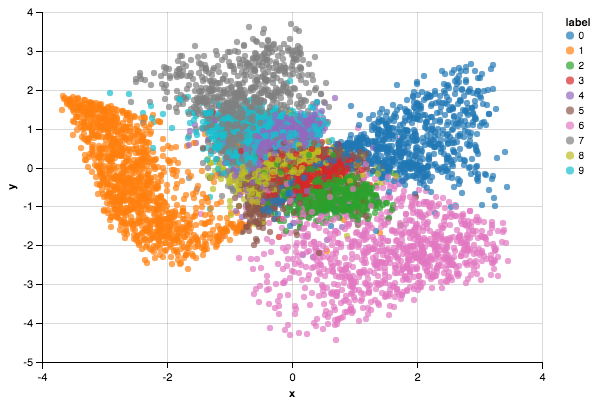

In [9]:
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')